<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Без фиксированного сида при каждом запуске кода будут генерироваться другие случайные числа. Это приведет к разным разбиениям данных на train/test, разной инициализации весов моделей, разным результатам перемешивания данных.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [ ]:
np.random.seed(42)
print("30 случайных строк тренировочного датасета:")
print(df_train.sample(30, random_state=42))

30 случайных строк тренировочного датасета:
                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000

In [ ]:
print ("Первые 5 строк тестового датасета")
print(df_test.head())
print("Последние 5 строк тестового датасета")
print(df_test.tail())

Первые 5 строк тестового датасета
                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at

In [ ]:
print("Анализ пропущенных значений")
missing_values = df_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

if len(columns_with_missing)>0:
    print("Колонки с пропущенными значениями:")
    for col, count in columns_with_missing.items():
        print(f"{col} : {count} пропускa")
else:
    print("Пропущенных значений не обнаружено")

Анализ пропущенных значений
Колонки с пропущенными значениями:
mileage : 202 пропускa
engine : 202 пропускa
max_power : 196 пропускa
torque : 203 пропускa
seats : 202 пропускa


In [ ]:
print("Анализ дубликатов")
duplicates_count = df_train.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count}")

Анализ дубликатов
Количество дубликатов: 985


**Ответ на вопросы:**
1) Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Ответ: Можно увидеть структуру данных (типы колонок, названия признаков), можно визуально заметить отсутствующие значения, можно оценить качество данных (например, наличие аномалий или странных значений). Нельзя понять распределения признаков, корреляции между признаками, качество данных в целом, также нельзя оценить статистические закономерности в данных.

2) Достаточно ли метода duplicated для анализа дубликатов? Почему?

Ответ: Метод duplicated находит только полные дубликаты, где все значения совпадают. Например, он может пропустить разный регистр текста или пробелы в начале/конце строк. Плюс может не учитывать смысловые дубликаты. Исходя из этого, можно сделать вывод о том, что данного метода может быть недостаточно.

In [ ]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Car Prices Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 26.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from google.colab import files

profile.to_file("report.html")
files.download('report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
# Создаем копии и заполняем пропуски
df_train_filled = df_train.copy()
df_test_filled = df_test.copy()

# Проверяем пропуски до заполнения
train_missing_before = df_train.isnull().sum()
test_missing_before = df_test.isnull().sum()

# Находим числовые колонки с пропусками
numeric_columns = df_train_filled.select_dtypes(include=[np.number]).columns
columns_with_missing = train_missing_before[train_missing_before > 0].index

numeric_missing_columns = [col for col in columns_with_missing if col in numeric_columns]

# Заполняем пропуски медианами
for column in numeric_missing_columns:
    median_value = df_train_filled[column].median()
    print(f"Медиана для '{column}': {median_value}")

    # Заполняем
    df_train_filled[column] = df_train_filled[column].fillna(median_value)

    if column in df_test_filled.columns:
        df_test_filled[column] = df_test_filled[column].fillna(median_value)

# Переименовываем обратно
df_train = df_train_filled.copy()
df_test = df_test_filled.copy()

# Проверяем остались ли пропуски в тесте
test_missing_after = df_test.isnull().sum()
remaining_missing = test_missing_after[test_missing_after > 0]

if len(remaining_missing) > 0:
    print(f"В тесте остались пропуски: {list(remaining_missing.index)}")

    # Заполняем оставшиеся пропуски в тесте
    for column in remaining_missing.index:
        if column in df_train.columns:
            median_value = df_train[column].median()
            print(f"Заполняем '{column}' медианой: {median_value}")
            df_test[column] = df_test[column].fillna(median_value)

print(f"df_train пропуски: {df_train.isnull().sum().sum()}")
print(f"df_test пропуски: {df_test.isnull().sum().sum()}")


df_train пропуски: 0
df_test пропуски: 0


### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
TARGET_COLUMN = 'selling_price'
feature_columns=[col for col in df_train_filled.columns if col != TARGET_COLUMN]
duplicates=df_train_filled.duplicated(subset=feature_columns, keep=False)
duplicates_count=duplicates.sum()

print(f"Количество дубликатов: {duplicates_count}")
print("Примерчики дубликатов:")
duplicates_df = df_train_filled[duplicates]
# следующие 6 строк кода сделал deepseek
for i, (_, group) in enumerate(duplicates_df.groupby(feature_columns)):
        if len(group) > 1:
            print(f"Группа {i+1}:")
            print(group[['name', 'year', 'km_driven', TARGET_COLUMN]].head(2))
            if i >= 2:
                break

Количество дубликатов: 0
Примерчики дубликатов:


In [ ]:
df_train = df_train_filled.drop_duplicates(subset=feature_columns, keep='first')
df_train= df_train.reset_index(drop=True)

print(f"Новый размер df_train: {df_train.shape}")
print(f"Новые индексы: от {df_train.index[0]} до {df_train.index[-1]}")

Новый размер df_train: (5840, 12)
Новые индексы: от 0 до 5839


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
# функцию по преобразованию типов данных сгенерировал deepseek
def clean_numeric_string(value):

    if pd.isna(value):
        return np.nan

    if isinstance(value, (int, float)):
        return float(value)

    value_str = str(value).strip()

    cleaned = ''.join(char for char in value_str
                     if char.isdigit() or char == '.' or char == '-')

    if not cleaned or cleaned == '-' or cleaned == '.':
        return np.nan

    try:
        return float(cleaned)
    except ValueError:
        return np.nan

columns_to_clean = ['mileage', 'engine', 'max_power']
for column in columns_to_clean:
  df_train[column] = df_train[column].apply(clean_numeric_string)
  if column in df_test.columns:
        df_test[column] = df_test[column].apply(clean_numeric_string)

df_train = df_train.drop('torque', axis=1, errors='ignore')
df_test = df_test.drop('torque', axis=1, errors='ignore')

cleaned_columns = [col for col in columns_to_clean if col in df_train.columns]
print("Типы данных после преобразований")
print (df_train[cleaned_columns].dtypes)


Типы данных после преобразований
mileage      float64
engine       float64
max_power    float64
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train['engine'] = df_train['engine'].astype('Int64')
df_test['engine'] = df_test['engine'].astype('Int64')
df_train['seats'] = df_train['seats'].astype('Int64')
df_test['seats'] = df_test['seats'].astype('Int64')

print(f"engine: {df_train['engine'].dtype}")
print(f"seats: {df_train['seats'].dtype}")

engine: Int64
seats: Int64


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
# повторно определяем числовые и категориальные колонки
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

print(f"Числовые колонки: {list(numeric_columns)}")
print(f"Категориальные колонки: {list(categorical_columns)}")

print("Описание числовых признаков train")
print(df_train[numeric_columns].describe())

print("Описание категориальных признаков train")
print(df_train[categorical_columns].describe())

print("Описагие числовых признаков test")
print(df_test[numeric_columns].describe())

print("Описание категориальных признаков test")
print(df_test[categorical_columns].describe())

Числовые колонки: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
Категориальные колонки: ['name', 'fuel', 'seller_type', 'transmission', 'owner']
Описание числовых признаков train
          year  selling_price   km_driven  mileage   engine  max_power  \
count 5840.000       5840.000    5840.000 5840.000 5840.000   5840.000   
mean  2013.428     522960.091   73952.242   19.431 1429.449     87.906   
std      4.096     535432.002   60071.137    3.986  485.663     31.640   
min   1983.000      29999.000       1.000    0.000  624.000      0.000   
25%   2011.000     250000.000   39000.000   16.950 1197.000     68.000   
50%   2014.000     405000.000   70000.000   19.370 1248.000     81.860   
75%   2017.000     640000.000  100000.000   22.300 1498.000     99.000   
max   2020.000   10000000.000 2360457.000   42.000 3604.000    400.000   

         seats  
count 5840.000  
mean     5.427  
std      0.982  
min      2.000  
25%      5.000  
50%      5.000  

Вывод: предобработка не внесла никаких значительных искажений. Данные можно использовать дальше.

In [ ]:
assert df_train.shape == (5840, 13)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

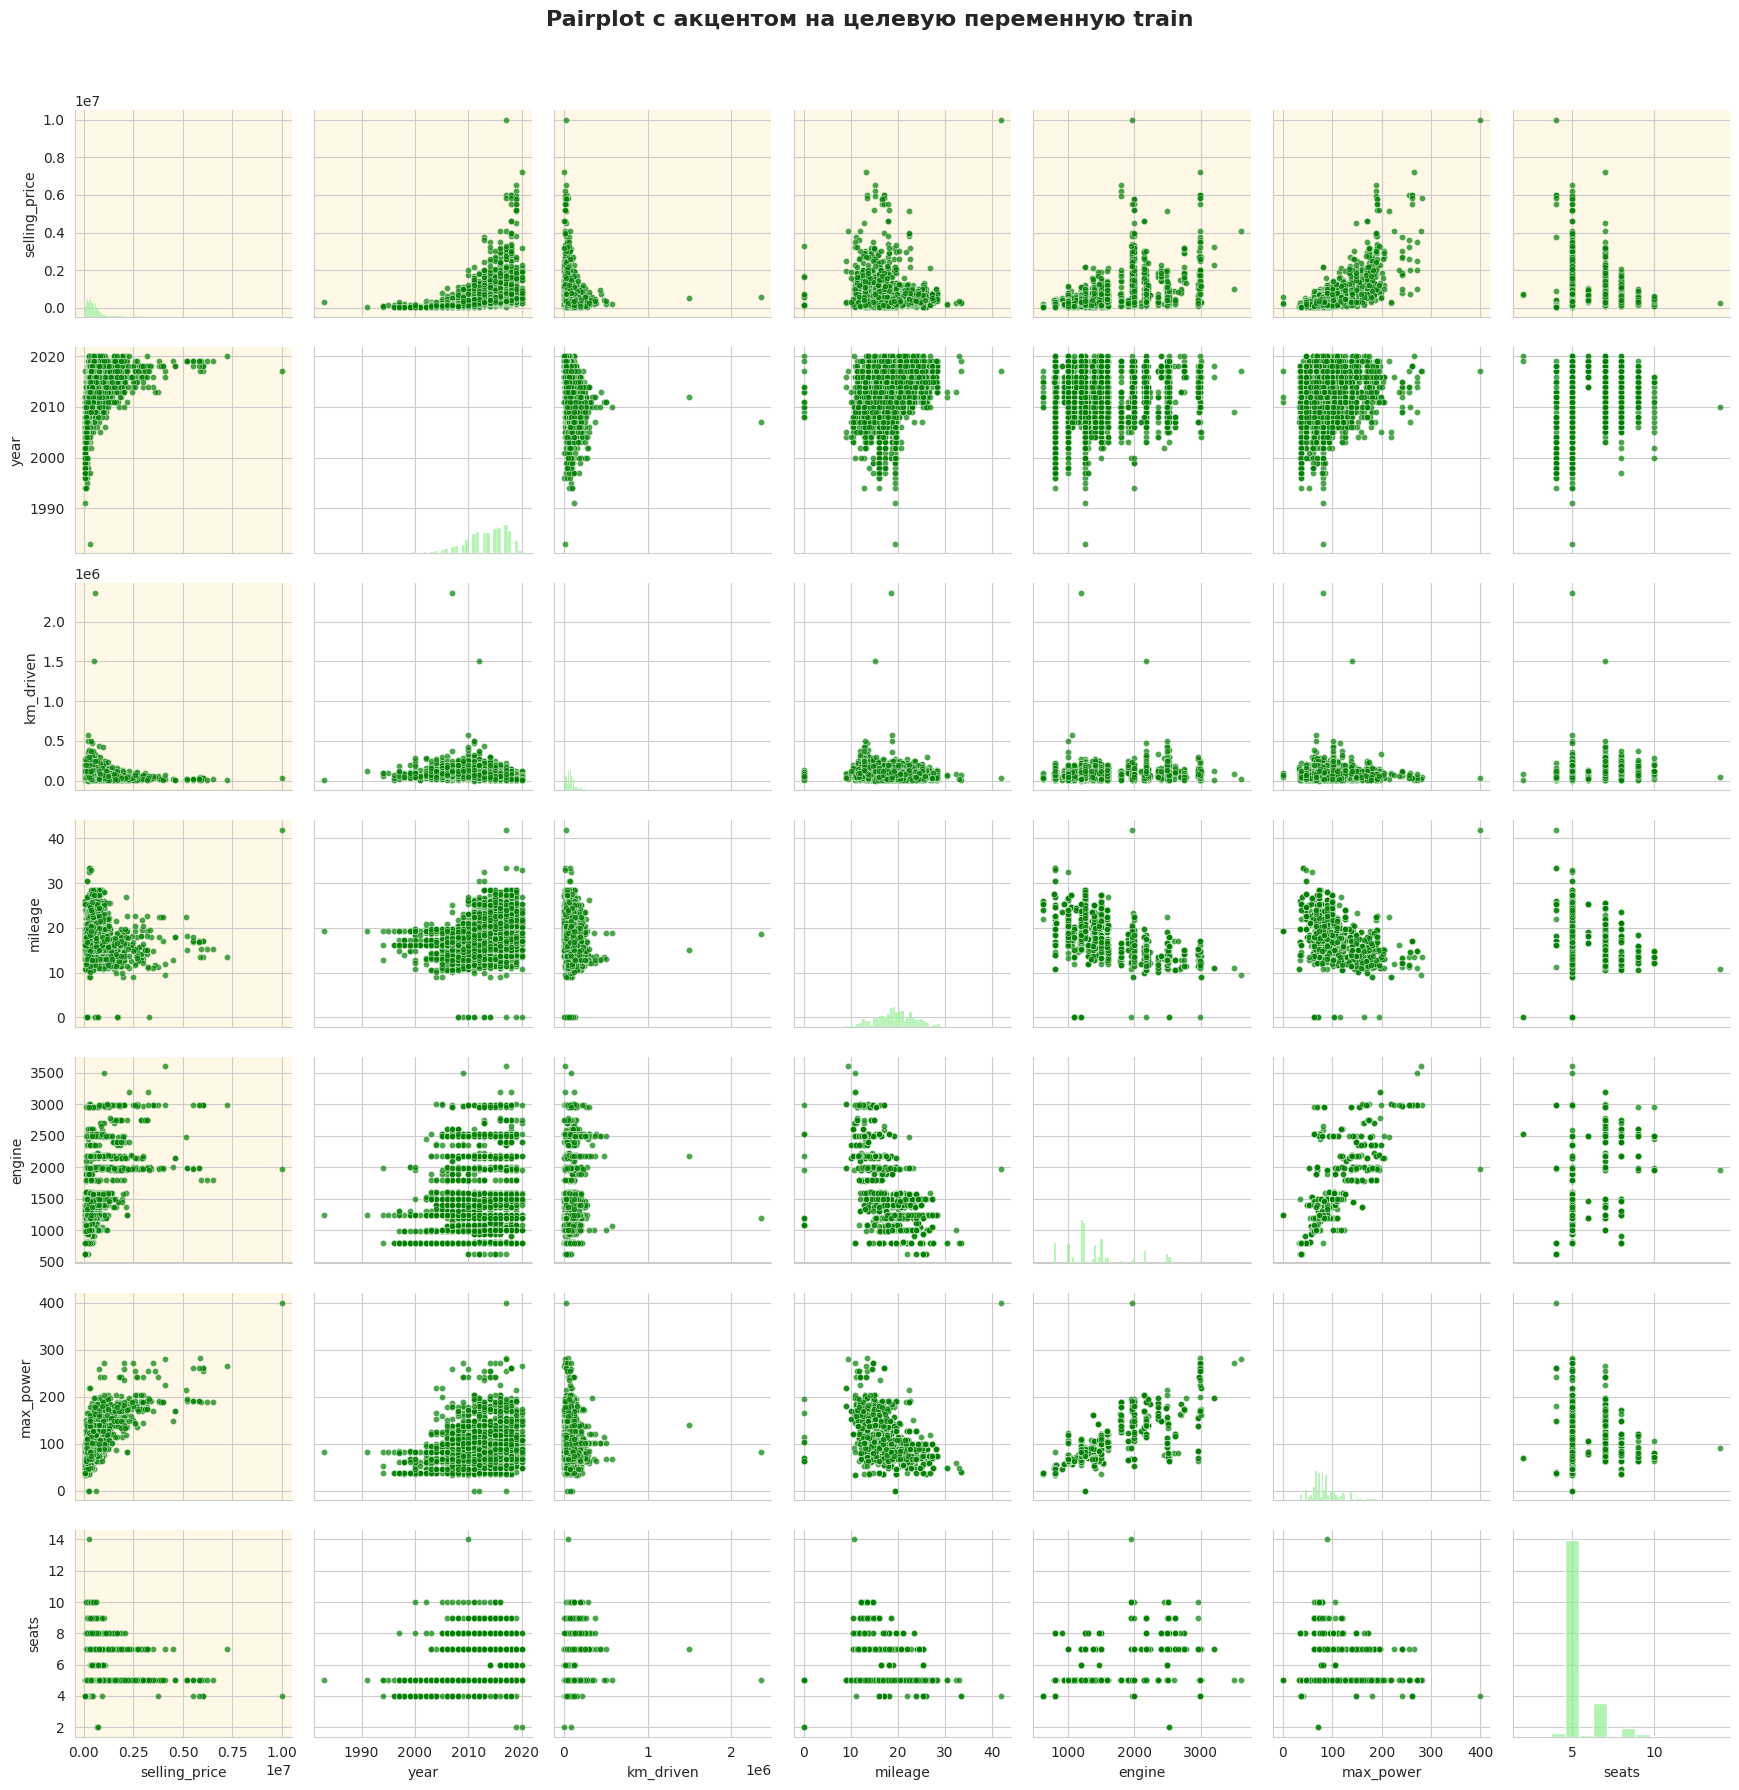

In [ ]:
# Попарные распредения для train
if 'selling_price' in df_train.columns:
    target_first = ['selling_price'] + [col for col in numeric_columns if col != 'selling_price']

    target_plot = sns.pairplot(df_train[target_first],
                              diag_kind='hist',
                              plot_kws={
                                  'alpha': 0.7,
                                  's': 20,
                                  'color': 'green'
                              },
                              diag_kws={
                                  'alpha': 0.7,
                                  'color': 'lightgreen'
                              })

    target_plot.fig.suptitle('Pairplot с акцентом на целевую переменную train',
                            fontsize=16, y=1.02, fontweight='bold')


    for i in range(len(target_first)):
        for j in range(len(target_first)):
            if i == 0 or j == 0:
                target_plot.axes[i, j].set_facecolor('#fff8e6')

    plt.tight_layout()
    plt.show()

**Ответы на вопросы:**
1) Можно ли предположить на основе распределений связь признаков с целевой переменной?

**Ответ: ** На основе распределений можно предположить, что сильнее всего на целевую переменную (selling_price) влияет: max_power , engine и year. То есть чем выше мощность двигателя, больше объем и чем новее машина - выше ее цена. Более слабое отрицательное влияние оказывает пробег. Расход топлива и количество мест имеют минимальное влияние.
2) Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

**Ответ: ** Да, можно.
Четко видно, что объем двигателя и мощность сильно связаны - больший объем обычно означает большую мощность. По сути эти признаки несут схожую информацию.

Также заметна связть между годом выпуска автомобиля и пробегом, так как обычно чем новее автомобиль, тем меньше пробег.

Плюс есть зависимость между мощностью и экономичностью (milleage), и объемом двигателя и экономичностью. Мощные автомобили с большими двигателями менее экономичны.



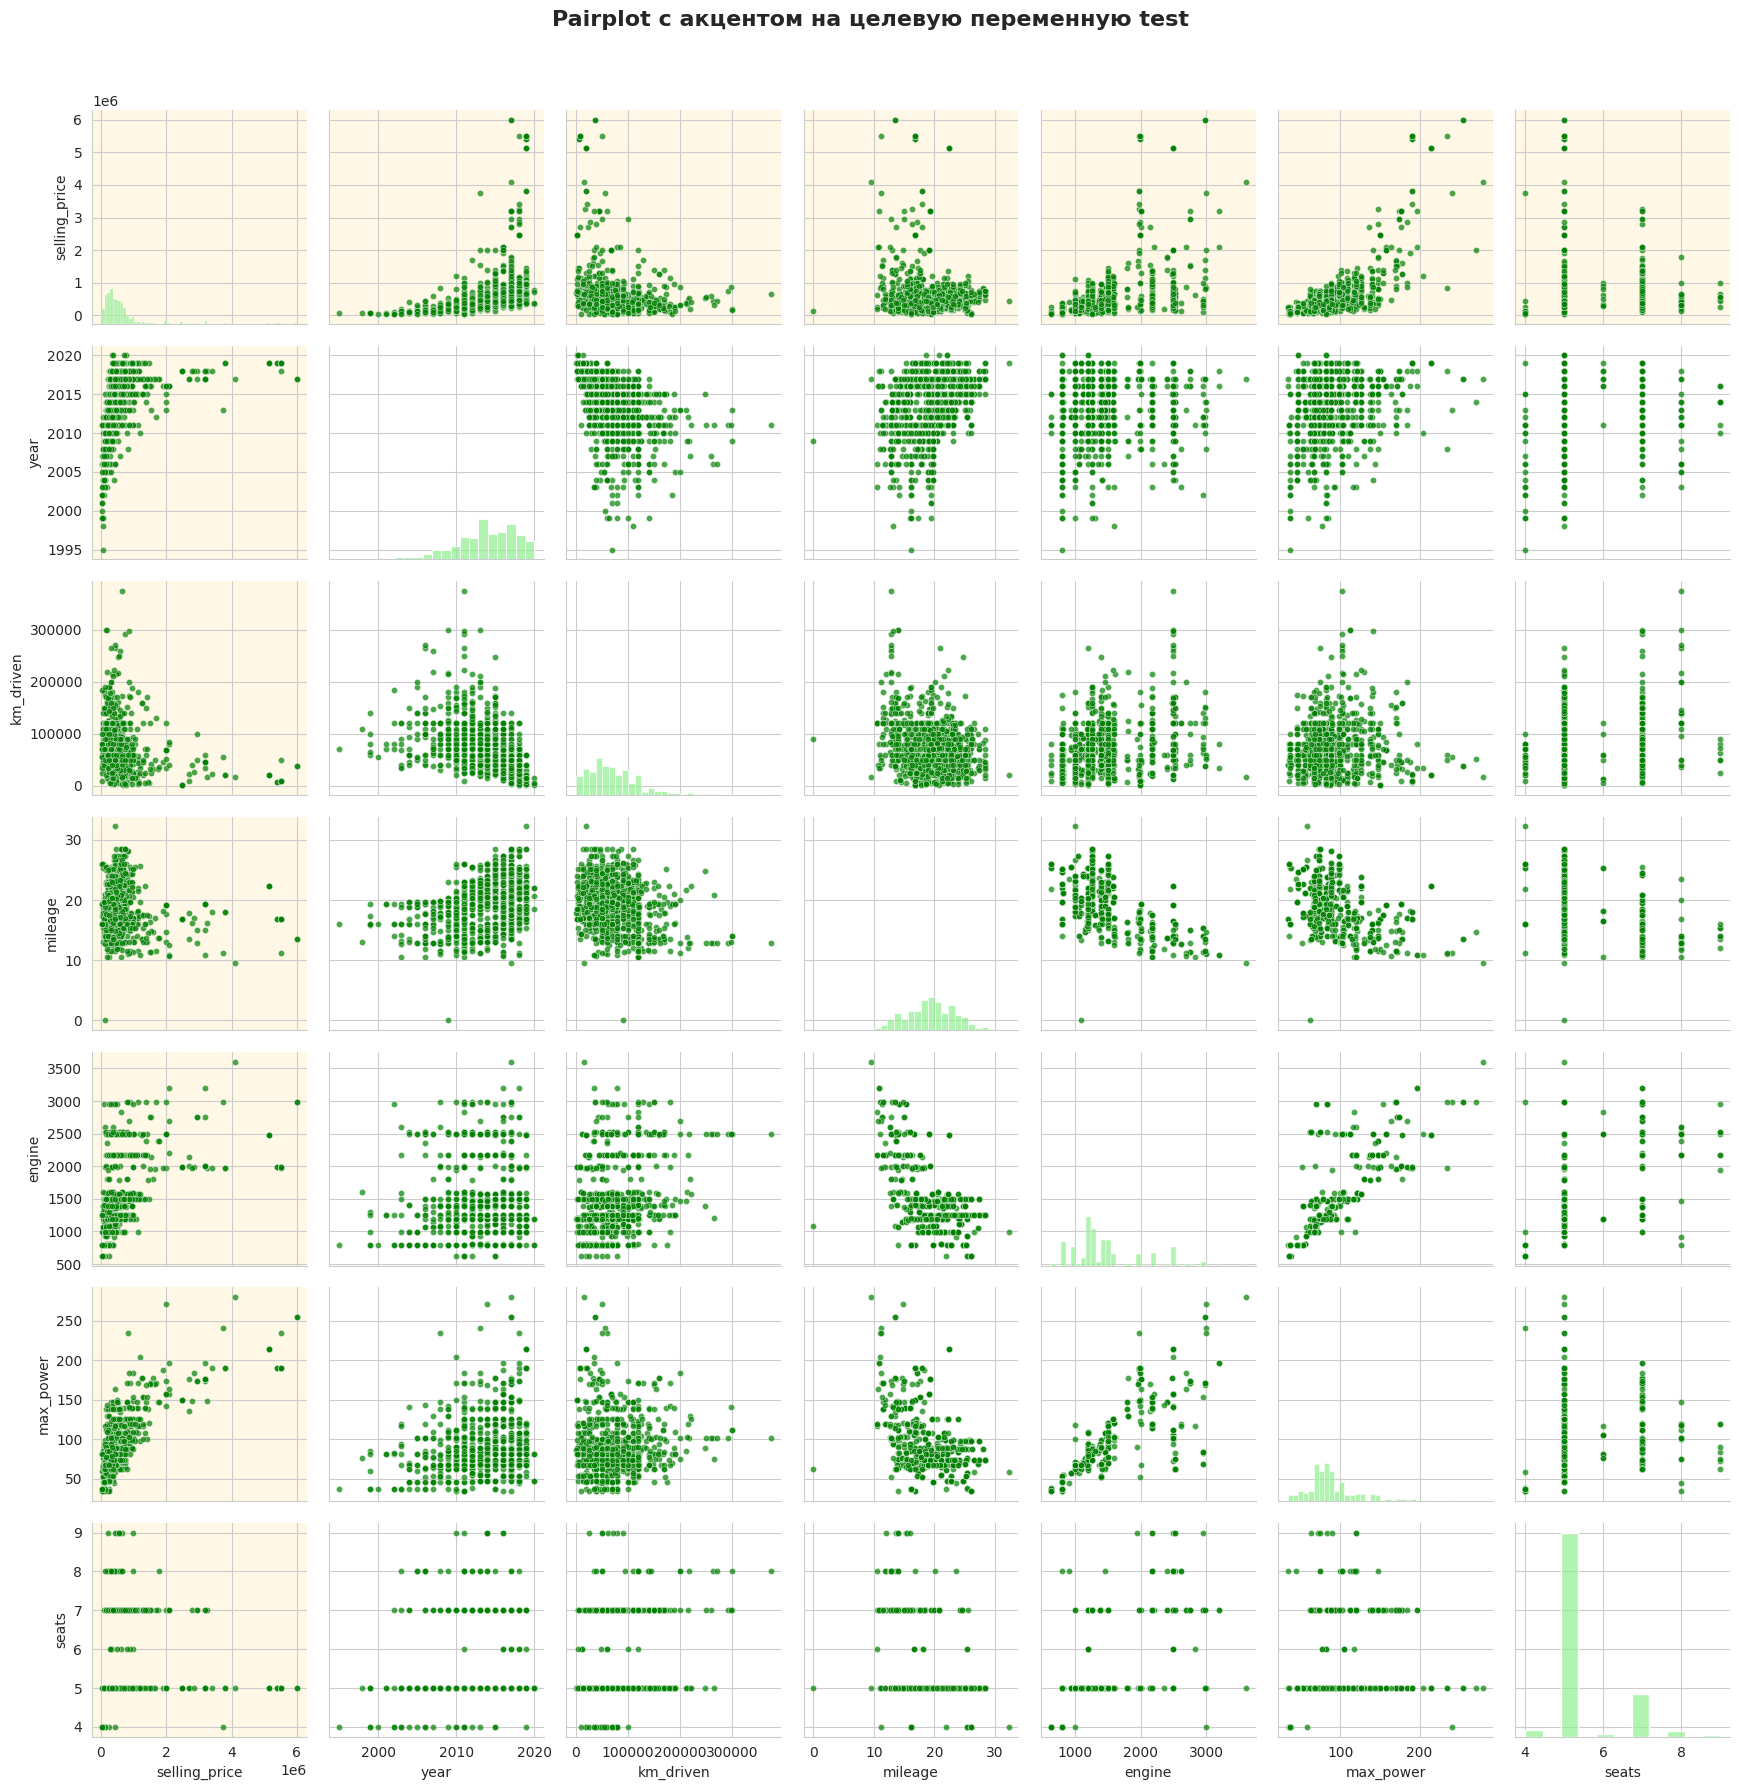

In [ ]:
# Попарные распределения для test
if 'selling_price' in df_test.columns:
    target_first_test = ['selling_price'] + [col for col in numeric_columns if col != 'selling_price']

    target_plot_test = sns.pairplot(df_test[target_first_test],
                              diag_kind='hist',
                              plot_kws={
                                  'alpha': 0.7,
                                  's': 20,
                                  'color': 'green'
                              },
                              diag_kws={
                                  'alpha': 0.7,
                                  'color': 'lightgreen'
                              })

    target_plot_test.fig.suptitle('Pairplot с акцентом на целевую переменную test',
                            fontsize=16, y=1.02, fontweight='bold')


    for i in range(len(target_first_test)):
        for j in range(len(target_first_test)):
            if i == 0 or j == 0:
                target_plot_test.axes[i, j].set_facecolor('#fff8e6')

    plt.tight_layout()
    plt.show()

Общие числовые признаки для сравнения (7):
  - selling_price
  - seats
  - km_driven
  - max_power
  - engine
  - year
  - mileage
ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ


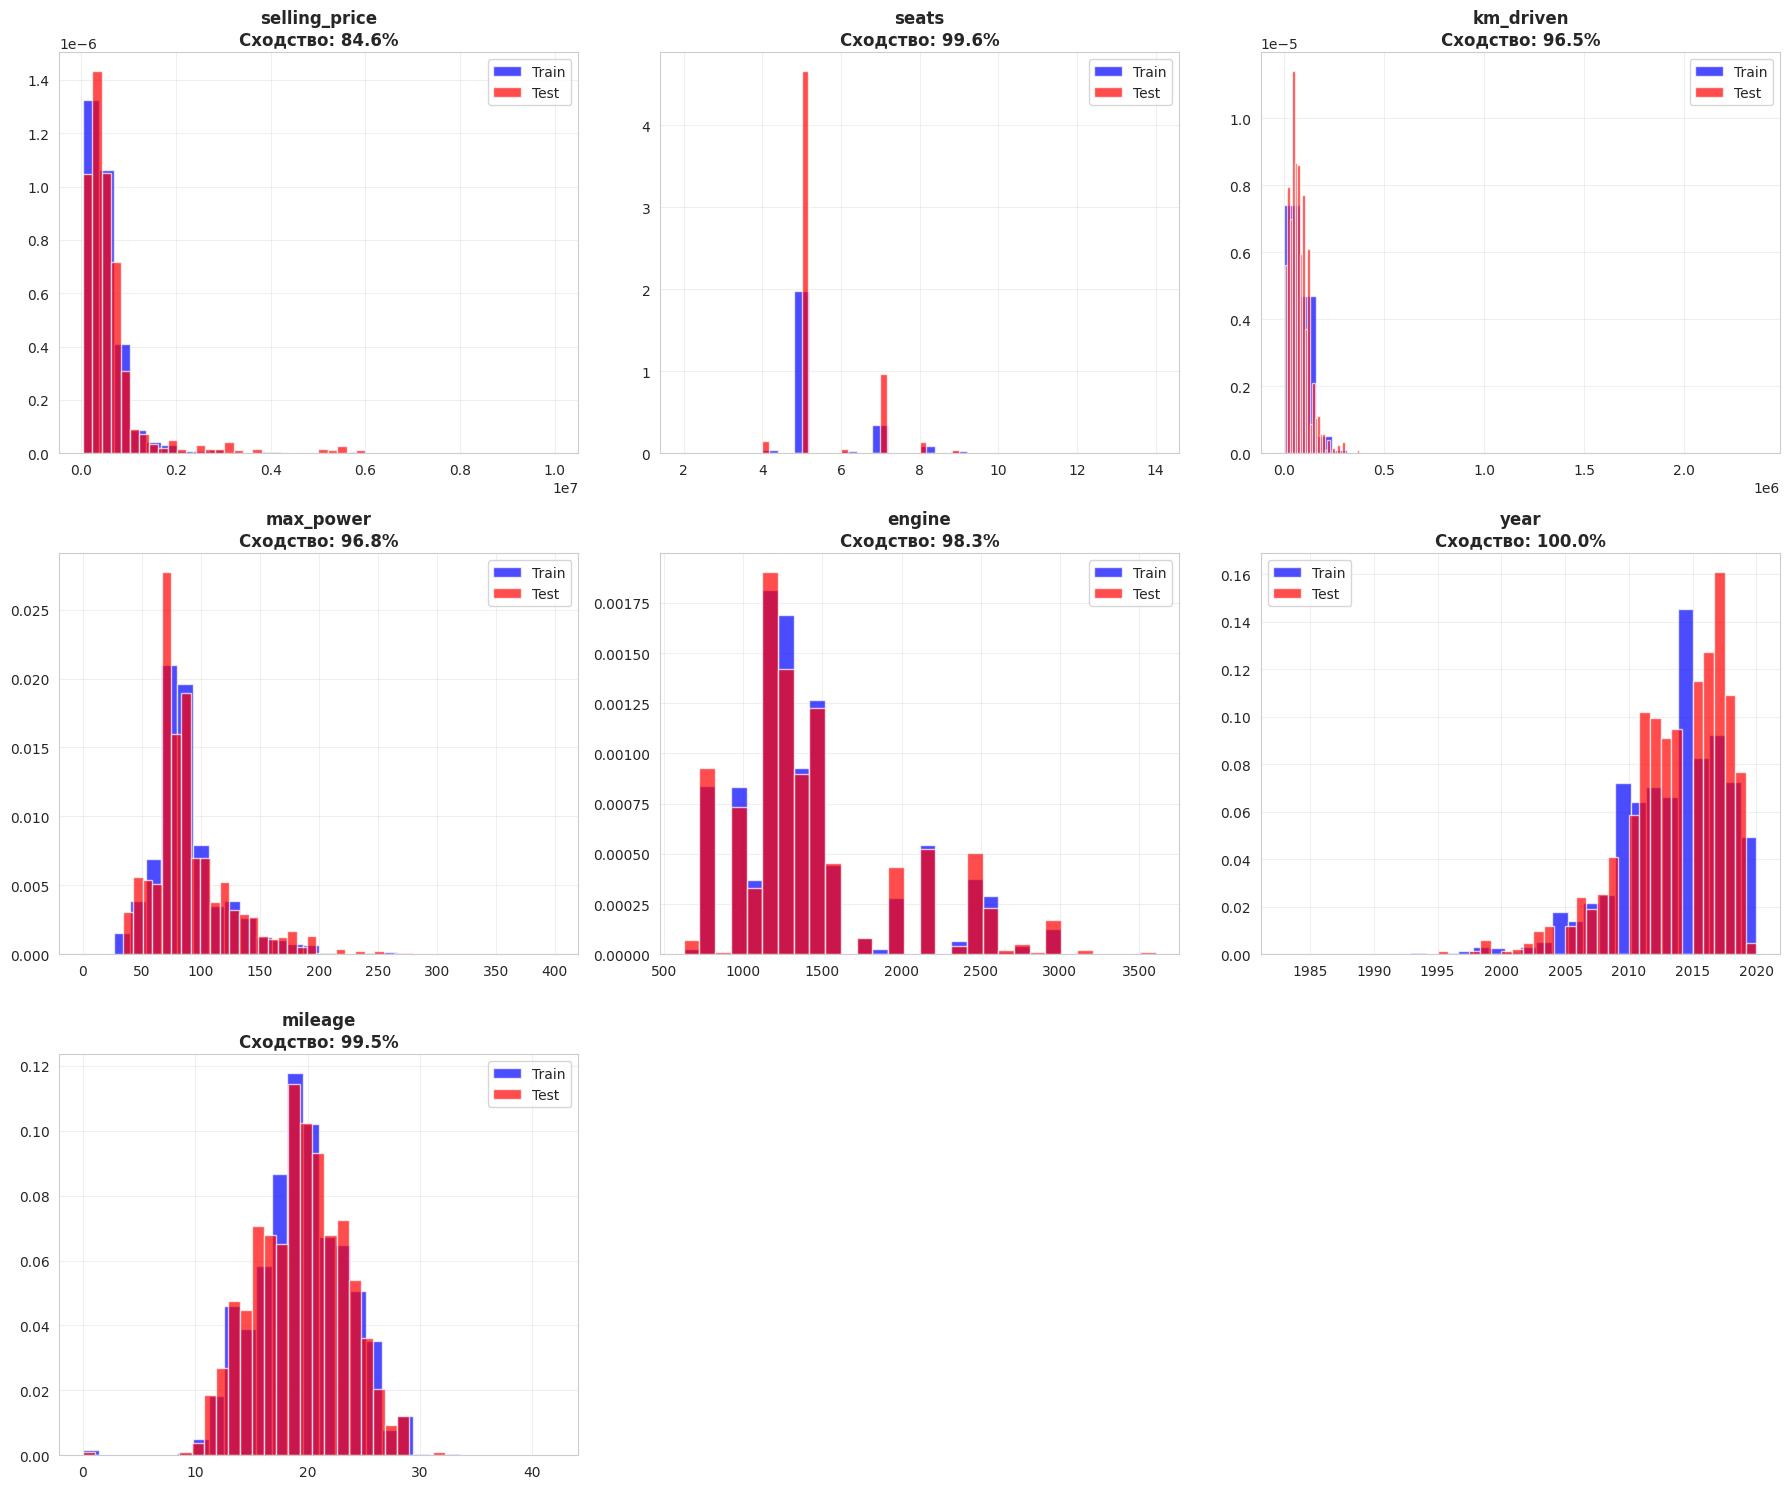

СВОДНАЯ СТАТИСТИКА СХОЖЕСТИ
Распределение по сходству средних:
   • Отличное (>90%): 6/7
   • Хорошее (80-90%): 1/7
   • Плохое (≤80%): 0/7

Статистические тесты:
   • Похожие распределения (KS-test): 5/7
   • Похожие средние (T-test): 5/7


In [ ]:
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Сделано через deepseek
def compare_train_test(df_train, df_test):

    numeric_cols_train = df_train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = df_test.select_dtypes(include=[np.number]).columns
    common_numeric = list(set(numeric_cols_train) & set(numeric_cols_test))

    print(f"Общие числовые признаки для сравнения ({len(common_numeric)}):")
    for col in common_numeric:
        print(f"  - {col}")

    results = []

    for column in common_numeric:
        train_data = df_train[column].dropna()
        test_data = df_test[column].dropna()

        train_mean = train_data.mean()
        test_mean = test_data.mean()
        train_std = train_data.std()
        test_std = test_data.std()

        mean_similarity = min(train_mean, test_mean) / max(train_mean, test_mean) * 100
        std_similarity = min(train_std, test_std) / max(train_std, test_std) * 100

        ks_stat, ks_pvalue = stats.ks_2samp(train_data, test_data)

        t_stat, t_pvalue = stats.ttest_ind(train_data, test_data, equal_var=False)

        results.append({
            'Признак': column,
            'Train_mean': train_mean,
            'Test_mean': test_mean,
            'Сходство_средних_%': mean_similarity,
            'KS_pvalue': ks_pvalue,
            'Ttest_pvalue': t_pvalue,
            'Похожие_распределения': ks_pvalue > 0.05,
            'Похожие_средние': t_pvalue > 0.05
        })

    return pd.DataFrame(results)


comparison_df = compare_train_test(df_train, df_test)

print("ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ")

n_cols = 3
n_features = len(comparison_df)
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

for idx, row in enumerate(comparison_df.iterrows()):
    feature = row[1]['Признак']
    row_idx = idx // n_cols
    col_idx = idx % n_cols

    axes[row_idx, col_idx].hist(df_train[feature].dropna(), alpha=0.7, label='Train',
                               bins=30, density=True, color='blue')
    axes[row_idx, col_idx].hist(df_test[feature].dropna(), alpha=0.7, label='Test',
                               bins=30, density=True, color='red')
    axes[row_idx, col_idx].set_title(f'{feature}\nСходство: {row[1]["Сходство_средних_%"]:.1f}%',
                                   fontweight='bold')
    axes[row_idx, col_idx].legend()
    axes[row_idx, col_idx].grid(True, alpha=0.3)


for idx in range(n_features, n_rows * n_cols):
    row_idx = idx // n_cols
    col_idx = idx % n_cols
    axes[row_idx, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

print("СВОДНАЯ СТАТИСТИКА СХОЖЕСТИ")

good_similarity = (comparison_df['Сходство_средних_%'] > 90).sum()
moderate_similarity = ((comparison_df['Сходство_средних_%'] > 80) &
                      (comparison_df['Сходство_средних_%'] <= 90)).sum()
poor_similarity = (comparison_df['Сходство_средних_%'] <= 80).sum()

similar_distributions = comparison_df['Похожие_распределения'].sum()
similar_means = comparison_df['Похожие_средние'].sum()

print(f"Распределение по сходству средних:")
print(f"   • Отличное (>90%): {good_similarity}/{n_features}")
print(f"   • Хорошее (80-90%): {moderate_similarity}/{n_features}")
print(f"   • Плохое (≤80%): {poor_similarity}/{n_features}")

print(f"\nСтатистические тесты:")
print(f"   • Похожие распределения (KS-test): {similar_distributions}/{n_features}")
print(f"   • Похожие средние (T-test): {similar_means}/{n_features}")


**Ответ на вопрос:** Похожими ли оказались совокупности при разделении на трейн и тест?

**Ответ:**
Признаки показывают хорошую схожесть, за исключением целевой переменной selling_price. Возможно в тестовую выборку просто попали более новые автомобили, из-за чего цена выше, чем на тренировочной.
Но в целом данные пригодны для моделирования.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Матрица корреляций (численные значения):
                year  selling_price  km_driven  mileage  engine  max_power  \
year           1.000          0.427     -0.369    0.341   0.003      0.157   
selling_price  0.427          1.000     -0.165   -0.105   0.448      0.693   
km_driven     -0.369         -0.165      1.000   -0.182   0.230      0.025   
mileage        0.341         -0.105     -0.182    1.000  -0.573     -0.373   
engine         0.003          0.448      0.230   -0.573   1.000      0.681   
max_power      0.157          0.693      0.025   -0.373   0.681      1.000   
seats          0.041          0.150      0.192   -0.451   0.652      0.244   

               seats  
year           0.041  
selling_price  0.150  
km_driven      0.192  
mileage       -0.451  
engine         0.652  
max_power      0.244  
seats          1.000  


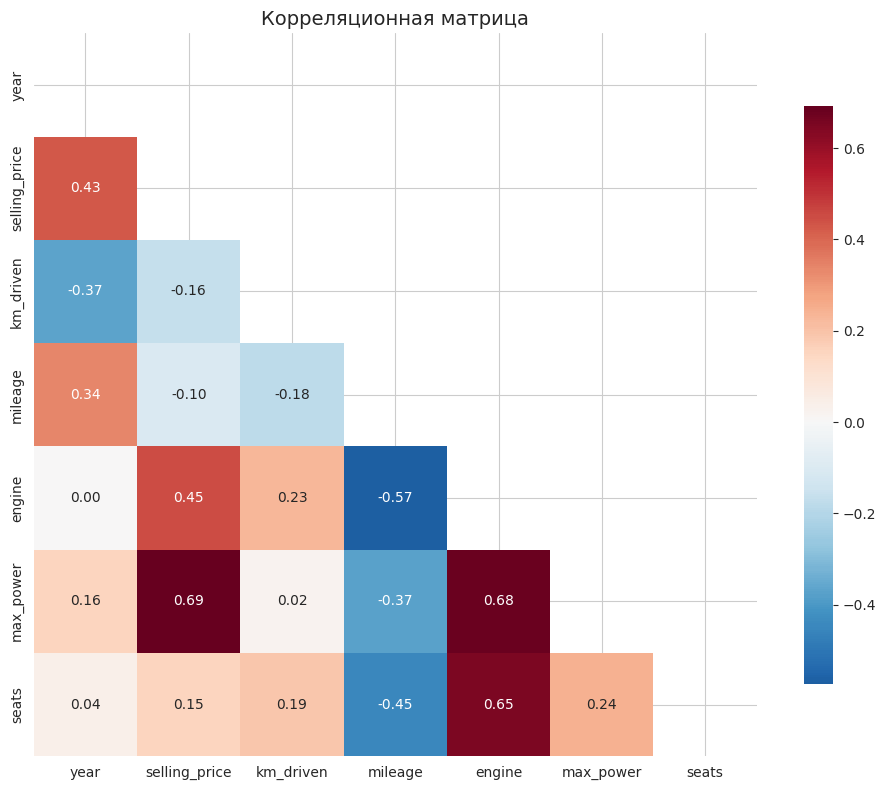

In [ ]:
if len(numeric_columns) > 1:
    correlations = df_train[numeric_columns].corr()

    print("Матрица корреляций (численные значения):")
    print(correlations.round(3))

    # Визуализация корреляционной матрицы
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlations, dtype=bool))  # Маска для верхнего треугольника
    sns.heatmap(correlations, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', mask=mask,
                cbar_kws={'shrink': 0.8})
    plt.title('Корреляционная матрица', fontsize=14)
    plt.tight_layout()
    plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ на вопросы:**
1) Какие 2 признака наименее скоррелированы между собой?

**Ответ:**
Меньше всего связаны year и engine. Это означает, что год выпуска и объем двигателя практически не связаны линейно

2) Между какими наблюдается довольно сильная положительная линейная зависимость?

**Ответ:**
Сильная положительная зависимость между max_power и selling_price, а также между engine и max_power. Что логично, так как более мощные автомобили значительно дороже. А мощность напрямую связана с объемом двигателя.

3) Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ:**
Да правильно, так как корреляция между year и km_driven равна -0.369. Отрицательная корреляция подтверждает обратную зависимость.



### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

Обоснование: Категориальные признаки могут иметь сильное влияние на цену, но не отображаются в корреляционной матрице. Соответственно, их тоже следует провизуализировать.


Распределение цен по категориям


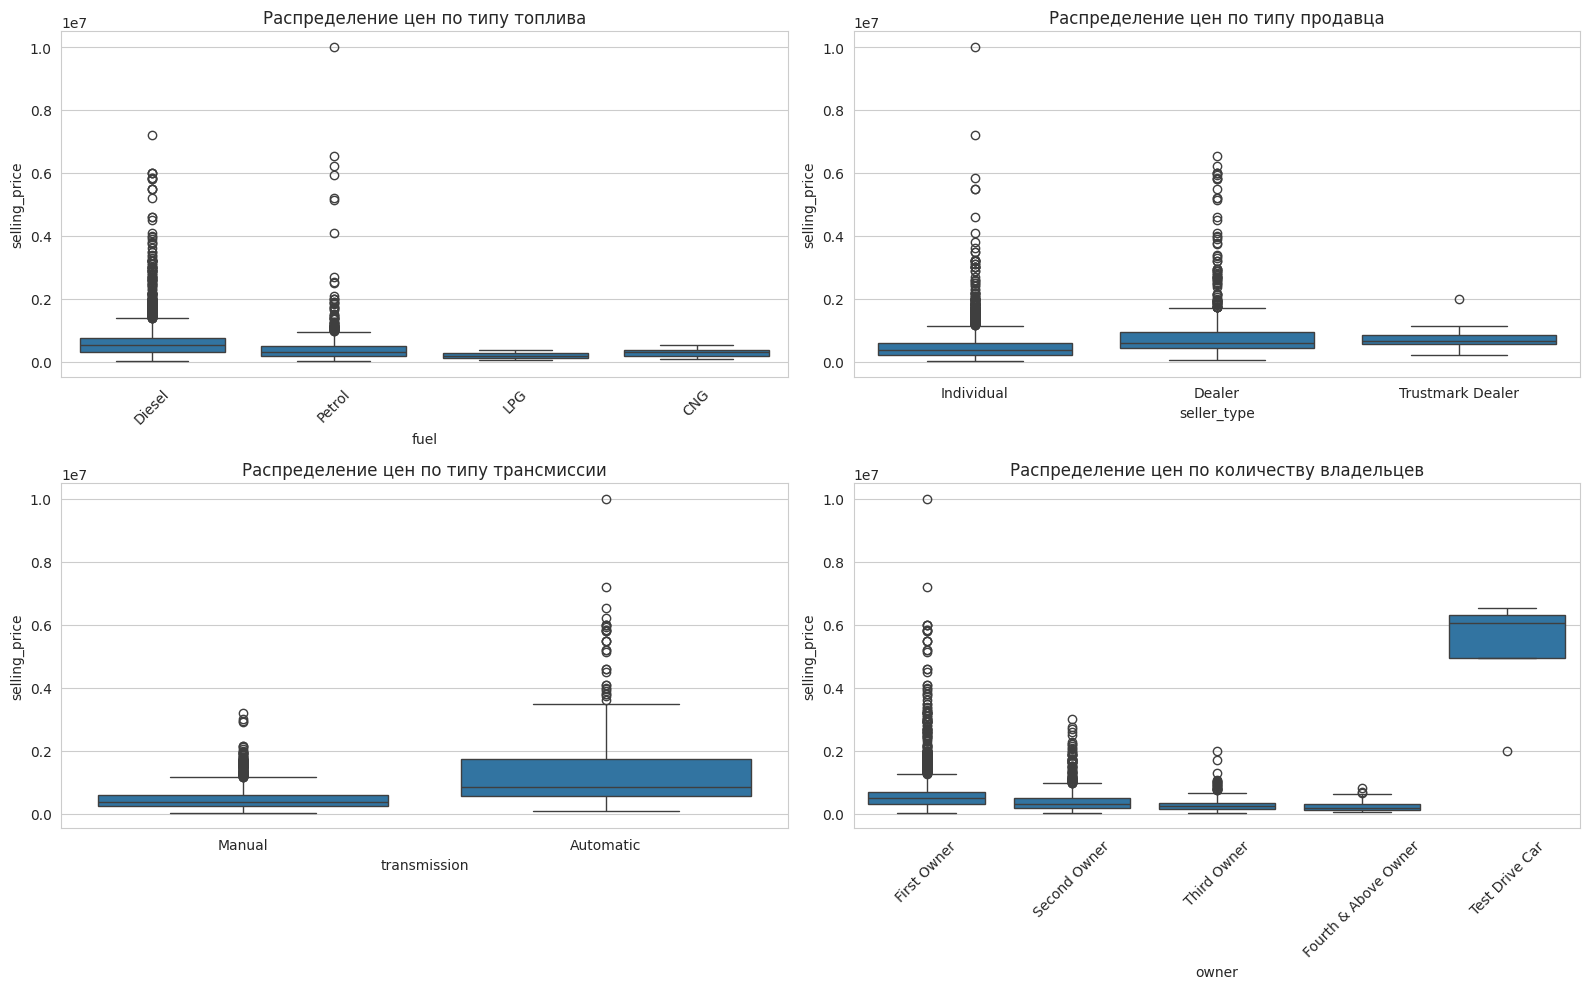

In [ ]:
print("Распределение цен по категориям")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(data=df_train, x='fuel', y='selling_price', ax=axes[0,0])
axes[0,0].set_title('Распределение цен по типу топлива')
axes[0,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_train, x='seller_type', y='selling_price', ax=axes[0,1])
axes[0,1].set_title('Распределение цен по типу продавца')

sns.boxplot(data=df_train, x='transmission', y='selling_price', ax=axes[1,0])
axes[1,0].set_title('Распределение цен по типу трансмиссии')

sns.boxplot(data=df_train, x='owner', y='selling_price', ax=axes[1,1])
axes[1,1].set_title('Распределение цен по количеству владельцев')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
# Сохраняем копии только с вещественными признаками
df_train_numeric = df_train[numeric_columns].copy()
df_test_numeric = df_test[numeric_columns].copy()

# Разделяем признаки в train и test
TARGET_COLUMN = 'selling_price'
if TARGET_COLUMN in df_train_numeric.columns:

    X_train = df_train_numeric.drop(TARGET_COLUMN, axis=1)
    y_train = df_train_numeric[TARGET_COLUMN]

if TARGET_COLUMN in df_test_numeric.columns:
    X_test = df_test_numeric.drop(TARGET_COLUMN, axis=1)
    y_test = df_test_numeric[TARGET_COLUMN]

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Обучаем
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Количество признаков: {model.coef_.shape[0]}")
print(f"Свободный член (intercept): {model.intercept_:.2f}")

# Предсказываем
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисляем метрики для тренировочных данных
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Вычисляем метрики для тестовых данных
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Метрики для тренировочных данных:")
print(f"  R2: {r2_train:.4f}")
print(f"  MSE: {mse_train:,.2f}")

print(f"Метрики для тестовых данных:")
print(f"  R2: {r2_test:.4f}")
print(f"  MSE: {mse_test:,.2f}")


Количество признаков: 6
Свободный член (intercept): -75622230.31
Метрики для тренировочных данных:
  R2: 0.5923
  MSE: 116,874,153,930.03
Метрики для тестовых данных:
  R2: 0.5941
  MSE: 233,298,779,730.45


**Выводы: **

1) Модель не переобучена, так как на трейне и на тесте приблизительно одинаковая R2. То есть, модель одинаково работает на тренировочных и тестовых данных.

2) MSE на тесте в 2 раза выше, чем на трейне. Отсюда следует, что ошибки предсказания на новых данных выше.

3) R2 низковат. В целом модель можно использовать для приблизительной оценки цены, но лучше все-таки ее улучшить.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Стандартизируем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

#Обучаем
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled_df, y_train)

print(f"Количество признаков: {model_scaled.coef_.shape[0]}")
print(f"Свободный член: {model_scaled.intercept_:.2f}")

# Предсказываем
y_train_pred_scaled = model_scaled.predict(X_train_scaled_df)
y_test_pred_scaled = model_scaled.predict(X_test_scaled_df)

# Вычисляем метрики
r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)
mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print("Метрики после стандартизации")
print(f"Тренировочные данные:")
print(f"  R²: {r2_train_scaled:.4f}")
print(f"  MSE: {mse_train_scaled:,.2f}")

print(f"Тестовые данные:")
print(f"  R²: {r2_test_scaled:.4f}")
print(f"  MSE: {mse_test_scaled:,.2f}")

Количество признаков: 6
Свободный член: 522960.09
Метрики после стандартизации
Тренировочные данные:
  R²: 0.5923
  MSE: 116,874,153,930.03
Тестовые данные:
  R²: 0.5941
  MSE: 233,298,779,730.45


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

/tmp/ipython-input-1902847589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Абсолютное_значение', y='Признак', ax=ax1, palette='viridis')
/tmp/ipython-input-1902847589.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Коэффициент', y='Признак', ax=ax2, palette='coolwarm')


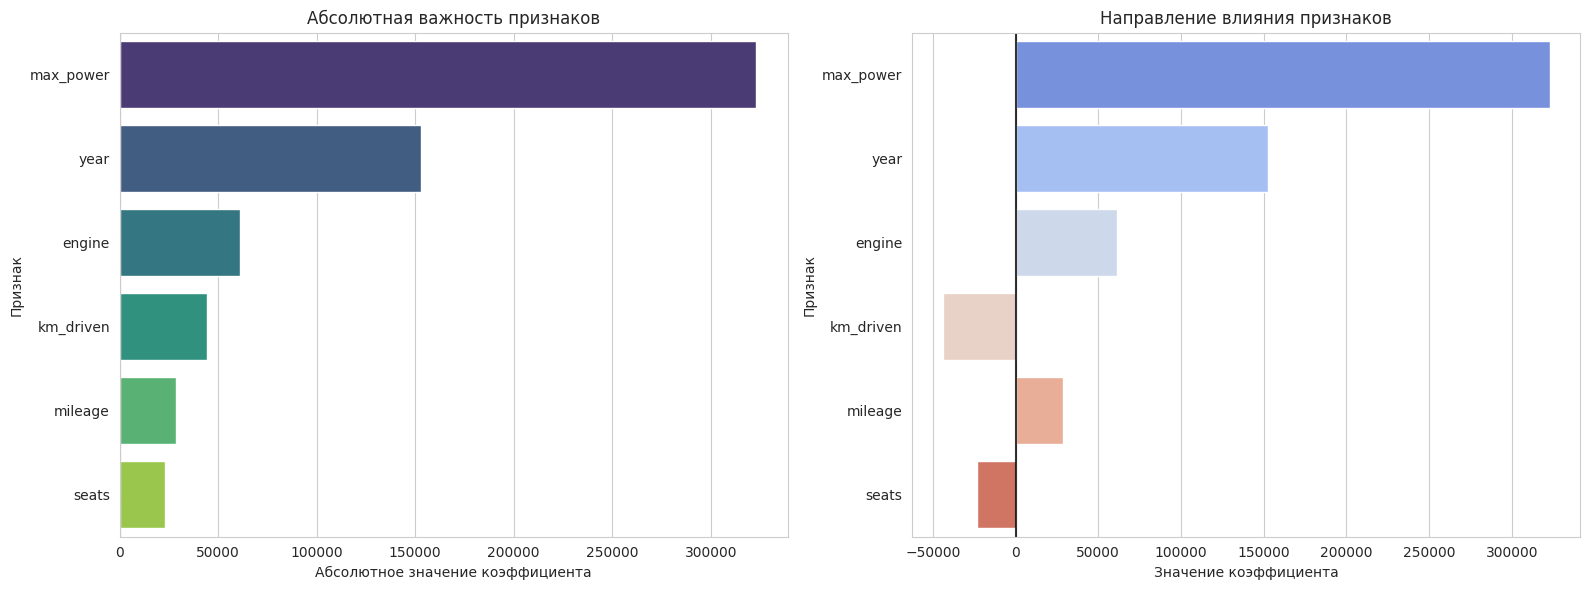

In [ ]:
feature_importance = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': model_scaled.coef_,
    'Абсолютное_значение': np.abs(model_scaled.coef_)
}).sort_values('Абсолютное_значение', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=feature_importance, x='Абсолютное_значение', y='Признак', ax=ax1, palette='viridis')
ax1.set_title('Абсолютная важность признаков')
ax1.set_xlabel('Абсолютное значение коэффициента')
ax1.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Порог значимости')

sns.barplot(data=feature_importance, x='Коэффициент', y='Признак', ax=ax2, palette='coolwarm')
ax2.set_title("Направление влияния признаков")
ax2.set_xlabel('Значение коэффициента')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.8)

plt.tight_layout()
plt.show()

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso
# Обучаем
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled_df, y_train)

print(f"Свободный член: {lasso_model.intercept_:.2f}")

# Предсказываем
y_train_pred_lasso = lasso_model.predict(X_train_scaled_df)
y_test_pred_lasso = lasso_model.predict(X_test_scaled_df)

# Вычисляем метрики
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE (y_train, y_train_pred_lasso)
mse_test_lasso = MSE (y_test, y_test_pred_lasso)

print(f"Метрики на тренировочных данных:")
print(f"  R2: {r2_train_lasso:.4f}")
print(f"  MSE: {mse_train_lasso:,.2f}")

print(f"Метрики на тестовых данных:")
print(f"  R2: {r2_test_lasso:.4f}")
print(f"  MSE: {mse_test_lasso:,.2f}")



Свободный член: 522960.09
Метрики на тренировочных данных:
  R2: 0.5923
  MSE: 116,874,153,940.14
Метрики на тестовых данных:
  R2: 0.5941
  MSE: 233,299,450,599.17


In [ ]:
#Смотрим на коэффициенты с LASSO
zeroed_coefs = lasso_coefs['Занулен'].sum()
total_coefs = len(lasso_coefs)

print(f"Всего признаков: {total_coefs}")
print(f"Занулено коэффициентов: {zeroed_coefs}")

Всего признаков: 6
Занулено коэффициентов: 0


Вывод:
Все 6 признаков остались в модели с ненулевыми весами. L1-регуляризация с alpha=1.0 не выполнила отбор признаков. Качество модели идентично обычной линейной регрессии.

Возможные причины отсутствия зануления - Значение альфа=1 не подходит для данных такого маштаба. Еще возможно отсутствует сильная мультиколлинеарность, типо корреляции 0.68 между engine и max_power недостаточно для зануления.



### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
}

lasso_grid = GridSearchCV(
    Lasso(random_state=42, max_iter=10000),
    param_grid,
    cv=10,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

lasso_grid.fit(X_train_scaled_df, y_train)

# Результаты
best_alpha = lasso_grid.best_params_['alpha']
print(f"Лучший аlpha: {best_alpha}")
print(f"Лучший R2 на CV: {lasso_grid.best_score_:.4f}")

 # Лучшая модель:
best_lasso = lasso_grid.best_estimator_

# Статистика зануления
lasso_coefs_analysis = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': best_lasso.coef_,
    'Абсолютное_значение': np.abs(best_lasso.coef_),
    'Занулен': best_lasso.coef_ == 0
}).sort_values('Абсолютное_значение', ascending=False)
zeroed_count = lasso_coefs_analysis['Занулен'].sum()
total_features = len(lasso_coefs_analysis)
print(f"Всего признаков: {total_features}")
print(f"Занулено: {zeroed_count}")

Лучший аlpha: 10000.0
Лучший R2 на CV: 0.5727
Всего признаков: 6
Занулено: 1


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}
total_combinations = len(param_grid['alpha']) * len(param_grid['l1_ratio'])
total_models = total_combinations * 10
print(f"Всего комбинаций параметров: {total_combinations}")
print(f"Всего будет обучено моделей: {total_models}")

elastic_net_grid = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000),
    param_grid,
    cv=10,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1,
)
elastic_net_grid.fit(X_train_scaled_df, y_train)

# Анализируем результаты
best_params = elastic_net_grid.best_params_
best_score = elastic_net_grid.best_score_

print("Лучшие параметры ELASTICNET:")
print(f"Лучший Alpha: {best_params['alpha']}")
print(f"Лучший L1 Ratio: {best_params['l1_ratio']}")
print(f"Лучший R² на CV: {best_score:.4f}")

# Получаем лучшую модель
best_elastic_net = elastic_net_grid.best_estimator_

# Анализируем коэффициенты лучшей модели
elastic_coefs_analysis = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': best_elastic_net.coef_,
    'Абсолютное_значение': np.abs(best_elastic_net.coef_),
    'Занулен': np.abs(best_elastic_net.coef_) < 1e-6  # Практически ноль
}).sort_values('Абсолютное_значение', ascending=False)

#Результаты
zeroed_count = elastic_coefs_analysis['Занулен'].sum()
total_features = len(elastic_coefs_analysis)

print(f"Всего признаков: {total_features}")
print(f"Занулено: {zeroed_count}")

Всего комбинаций параметров: 36
Всего будет обучено моделей: 360
Лучшие параметры ELASTICNET:
Лучший Alpha: 1.0
Лучший L1 Ratio: 0.9
Лучший R² на CV: 0.5761
Всего признаков: 6
Занулено: 0


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# Удаляем столбец name
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)


KeyError: "['name'] not found in axis"

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

NameError: name 'X_train_cat' is not defined

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Кодируем тренировочные данные
encoded_train = encoder.fit_transform(df_train[categorical_features])
encoded_train_df = pd.DataFrame(
    encoded_train,
    columns=encoder.get_feature_names_out(categorical_features),
    index=df_train.index
)

# Кодируем тестовые данные
encoded_test = encoder.transform(df_test[categorical_features])
encoded_test_df = pd.DataFrame(
    encoded_test,
    columns=encoder.get_feature_names_out(categorical_features),
    index=df_test.index
)

# Удаляем исходные категориальные колонки и добавляем закодированные
df_train = df_train.drop(categorical_features, axis=1)
df_train = pd.concat([df_train, encoded_train_df], axis=1)

df_test = df_test.drop(categorical_features, axis=1)
df_test = pd.concat([df_test, encoded_test_df], axis=1)

print(f"df_train после OneHot Encoding: {df_train.shape}")
print(f"df_test после OneHot Encoding: {df_test.shape}")

df_train после OneHot Encoding: (5840, 24)
df_test после OneHot Encoding: (1000, 24)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# Разбиваем данные
X_train_ridge = df_train.drop('selling_price', axis=1)
y_train_ridge = df_train['selling_price']
X_test_ridge = df_test.drop('selling_price', axis=1)
y_test_ridge = df_test['selling_price']

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    param_grid,
    cv=10,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

ridge_grid.fit(X_train_ridge, y_train_ridge)

# Лучшая моделька
best_ridge = ridge_grid.best_estimator_
best_alpha = ridge_grid.best_params_['alpha']
best_score = ridge_grid.best_score_

# Предсказания и метрики
y_test_pred_ridge = best_ridge.predict(X_test_ridge)
r2_test_ridge = r2_score(y_test_ridge, y_test_pred_ridge)

print(f"Лучшие параметры RIDGE:")
print(f"Лучший аlpha: {best_alpha}")
print(f"R2 на кросс-валидации: {best_score:.4f}")
print(f"R2 на тесте: {r2_test_ridge:.4f}")

print(f"Сравнение с LINEAR REGRESSION:")
print(f"Linear Regression R2 test: 0.5941")
print(f"Ridge Regression R2 test: {r2_test_ridge:.4f}")



Лучшие параметры RIDGE:
Лучший аlpha: 10.0
R2 на кросс-валидации: 0.6219
R2 на тесте: 0.6457
Сравнение с LINEAR REGRESSION:
Linear Regression R2 test: 0.5941
Ridge Regression R2 test: 0.6457


Вывод: Удалось улучший качество!!!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    #Ищем ошибку в процентах
    relative_error = np.abs((y_true - y_pred) / y_true) * 100
    within_10_percent = np.mean(relative_error <= 10)
    return within_10_percent
#Считаем метрику для всех моделей
models = {
    'Linear Regression': model,
    'Lasso': best_lasso,
    'ElasticNet': best_elastic_net,
    'Ridge': best_ridge
}

#Пересоздаем данные

X_train_categorical = df_train.drop('selling_price', axis=1)
X_test_categorical = df_test.drop('selling_price', axis=1)

# Обучаем линейной регрессией
lr_model = LinearRegression()
lr_model.fit(X_train_categorical, y_train)
y_pred_lr = lr_model.predict(X_test_categorical)
score_lr = business_metric(y_test, y_pred_lr)

# Обучаем Lasso
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_categorical, y_train)
y_pred_lasso = lasso_model.predict(X_test_categorical)
score_lasso = business_metric(y_test, y_pred_lasso)

# Обучаем Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_categorical, y_train)
y_pred_ridge = ridge_model.predict(X_test_categorical)
score_ridge = business_metric(y_test, y_pred_ridge)

# Обучаем Elasticnet
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_categorical, y_train)
y_pred_elastic = elastic_model.predict(X_test_categorical)
score_elastic = business_metric(y_test, y_pred_elastic)

print(f"{'Linear Regression':20}: {score_lr:.4f} ({score_lr*100:.2f}%)")
print(f"{'Lasso':20}: {score_lasso:.4f} ({score_lasso*100:.2f}%)")
print(f"{'Ridge':20}: {score_ridge:.4f} ({score_ridge*100:.2f}%)")
print(f"{'ElasticNet':20}: {score_elastic:.4f} ({score_elastic*100:.2f}%)")


Linear Regression   : 0.2490 (24.90%)
Lasso               : 0.2480 (24.80%)
Ridge               : 0.2470 (24.70%)
ElasticNet          : 0.2270 (22.70%)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.783e+14, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


Вывод: Лучшей моделью с учетом бизнес-метрики оказалась линейная регрессия

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)


In [119]:
import pickle
import pickle
import pandas as pd
from google.colab import files

print("СОХРАНЕНИЕ МОДЕЛЕЙ В GOOGLE COLAB")
print("=" * 50)

# Создаем artifacts с моделями
model_artifacts = {
    'metadata': {
        'description': 'Car price prediction models - Colab',
        'created_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    },

    'models': {},
    'preprocessing': {},
    'feature_info': {}
}

# Добавляем доступные модели
if 'model' in globals():
    model_artifacts['models']['linear_regression'] = model
if 'best_lasso' in globals():
    model_artifacts['models']['lasso'] = best_lasso
if 'best_ridge' in globals():
    model_artifacts['models']['ridge'] = best_ridge
if 'best_elastic_net' in globals():
    model_artifacts['models']['elastic_net'] = best_elastic_net

# Добавляем препроцессинг
if 'scaler' in globals():
    model_artifacts['preprocessing']['scaler'] = scaler
if 'encoder' in globals():
    model_artifacts['preprocessing']['encoder'] = encoder

# Добавляем информацию о признаках
if 'X_train_categorical' in globals():
    model_artifacts['feature_info']['feature_names'] = list(X_train_categorical.columns)
    model_artifacts['feature_info']['train_shape'] = X_train_categorical.shape

# Сохраняем в Colab
with open('car_price_models.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

# Проверяем размер
import os
file_size = os.path.getsize('car_price_models.pkl') / 1024 / 1024
print(f"Размер файла в Colab: {file_size:.2f} MB")

# СКАЧИВАЕМ ФАЙЛ НА КОМПЬЮТЕР

files.download('car_price_models.pkl')



СОХРАНЕНИЕ МОДЕЛЕЙ В GOOGLE COLAB
Размер файла в Colab: 0.00 MB
СКАЧИВАНИЕ ФАЙЛА НА КОМПЬЮТЕР:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Файл 'car_price_models.pkl' скачан на ваш компьютер!
